Import the important dependencies

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import  confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Access the Dataset of Heart Disease  prediction. 

Our goal is to predict the heart disease present or not.

In [4]:
Data=pd.read_csv (r'/content/Heart_Disease_Prediction.csv')
Data

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


Check the all information of dataset

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

Check the number of rows and columns in  our data

In [ ]:
Data.shape

(270, 14)

In [10]:
Data.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

Statistical information about dataset

In [ ]:
Data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


Check missing values or NaN values

In [ ]:
Data.isna().sum ()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Replace the string data of Heart Disease column with binary values 0 and 1
0 represent Absence or 1 represent Presence

In [ ]:
Data['Heart Disease'].replace ({'Absence':'0','Presence':'1'},inplace =True)

See first five rows

In [ ]:
Data.head ()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Counts how many cases in any one column 
Means
 See the Absence cases and Presence cases

In [ ]:
Data['Heart Disease'].value_counts ()

0    150
1    120
Name: Heart Disease, dtype: int64

In [ ]:
Data ['Chest pain type'].value_counts ()

4    129
3     79
2     42
1     20
Name: Chest pain type, dtype: int64

In [ ]:
Data['Number of vessels fluro'].value_counts ()

0    160
1     58
2     33
3     19
Name: Number of vessels fluro, dtype: int64

Check correlation between all features

In [ ]:
Data.corr ()

<ipython-input-12-cbb9977cb0f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Data.corr ()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333


Standard Deviations

In [ ]:
Std_dev=np.std (Data)
Std_dev

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3613: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Age                         9.092182
Sex                         0.467328
Chest pain type             0.948329
BP                         17.828501
Cholesterol                51.590433
FBS over 120                0.355247
EKG results                 0.996042
Max HR                     23.122778
Exercise angina             0.470079
ST depression               1.143087
Slope of ST                 0.613251
Number of vessels fluro     0.942147
Thallium                    1.937062
dtype: float64

Variance

In [ ]:
Variance=np.var (Data)
Variance

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3755: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Age                          82.667778
Sex                           0.218395
Chest pain type               0.899328
BP                          317.855432
Cholesterol                2661.572785
FBS over 120                  0.126200
EKG results                   0.992099
Max HR                      534.662840
Exercise angina               0.220974
ST depression                 1.306648
Slope of ST                   0.376077
Number of vessels fluro       0.887641
Thallium                      3.752209
dtype: float64

Heat map of correlation

<ipython-input-13-9067f61c5d5b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap (Data.corr ())


<Axes: >

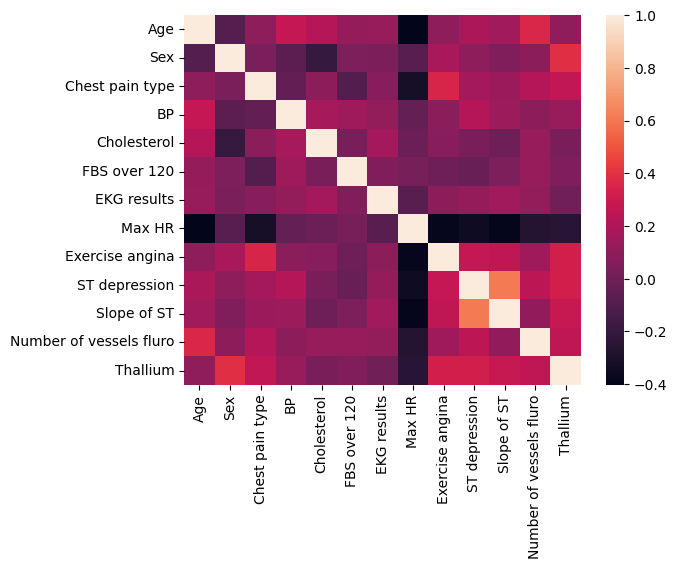

In [ ]:
sns.heatmap (Data.corr ())

Distribution plot of dataset

<ipython-input-58-3e964baf0b66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (Data)


<Axes: ylabel='Density'>

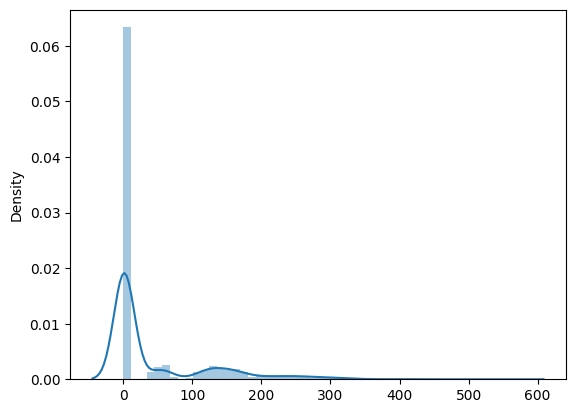

In [ ]:
sns.distplot (Data)

How values are distributed in any feature (normally ,negatively or positively )

<ipython-input-59-39f719c30f73>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Data ['Thallium'])


<Axes: xlabel='Thallium', ylabel='Density'>

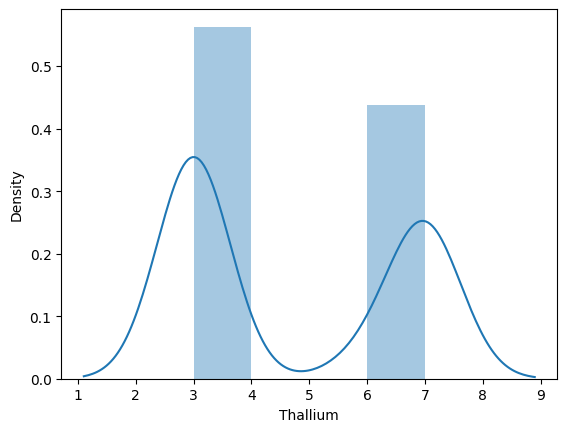

In [ ]:
sns.distplot(Data ['Thallium'])

Simple distribution or plot of BP feature

<Axes: >

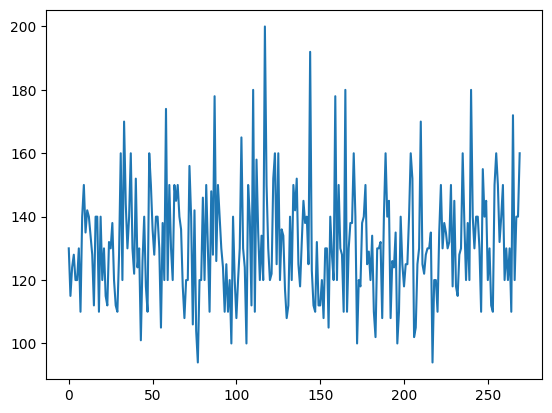

In [12]:
Data.BP.plot ()

Distribution of BP and Cholesterol features using scatter plot

<ipython-input-61-d8a06792f2b5>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot (x="BP",y="Cholesterol",palette="inferno",data=Data)


<Axes: xlabel='BP', ylabel='Cholesterol'>

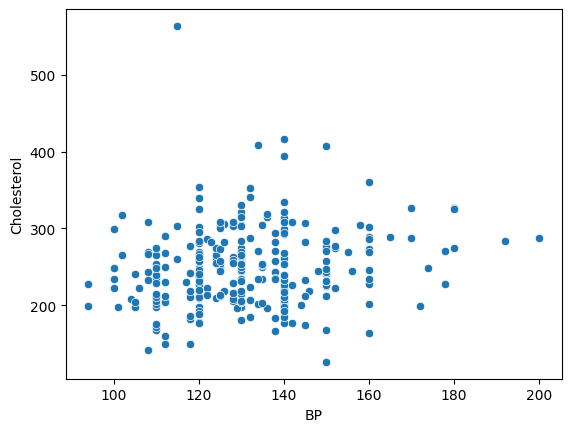

In [ ]:
sns.scatterplot (x="BP",y="Cholesterol",palette="inferno",data=Data)

Distribution of ST depression with Age

<ipython-input-62-f97e445661ee>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot (x="ST depression",y="Age",palette="inferno",data=Data)


<Axes: xlabel='ST depression', ylabel='Age'>

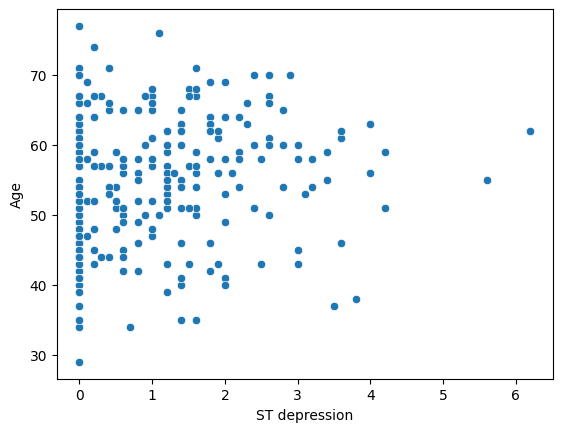

In [ ]:
sns.scatterplot (x="ST depression",y="Age",palette="inferno",data=Data)

Taking dependent and independent variable for prediction

In [ ]:
x=Data.drop(columns='Heart Disease',axis=1)
y=Data ['Heart Disease']
x

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


Standard scaling for classified our dataset

In [ ]:


Scaler=StandardScaler ()
Scaler.fit (x)
Stand_data=Scaler.transform (x)
Stand_data

array([[ 1.71209356,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581],
       [ 1.38213977, -1.45032695, -0.18355874, ...,  0.67641928,
        -0.71153494,  1.18927733],
       [ 0.2822938 ,  0.6894997 , -1.23804513, ..., -0.95423434,
        -0.71153494,  1.18927733],
       ...,
       [ 0.1723092 , -1.45032695, -1.23804513, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.2822938 ,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494,  0.67303154],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         2.47268219, -0.87570581]])

Take standard scaling data 
x and y variables for prediction

In [ ]:
x=Stand_data 
y=Data ['Heart Disease']

Splitting the dataset

In [ ]:
train_x,test_x, train_y,test_y=train_test_split (x,y, test_size=0.2,random_state=0)
train_x

array([[ 1.16217058,  0.6894997 ,  0.87092765, ..., -0.95423434,
        -0.71153494,  1.18927733],
       [-1.25749056,  0.6894997 ,  0.87092765, ...,  0.67641928,
        -0.71153494, -0.87570581],
       [ 0.3922784 , -1.45032695,  0.87092765, ...,  0.67641928,
        -0.71153494, -0.87570581],
       ...,
       [ 0.1723092 , -1.45032695,  0.87092765, ...,  2.3070729 ,
         1.41127648,  1.18927733],
       [-1.14750596,  0.6894997 ,  0.87092765, ..., -0.95423434,
         0.34987077, -0.87570581],
       [ 1.38213977,  0.6894997 ,  0.87092765, ...,  0.67641928,
         1.41127648, -0.87570581]])

Training and Model evaluation

(1)Use logistics regression 

and find accuracy 
How much the model is accurate

In [ ]:


Lr=LogisticRegression()
Lr.fit (train_x,train_y)

LogisticRegression()

In [ ]:
Prediction =Lr.predict (test_x)
Prediction

array(['0', '0', '1', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '0', '0'], dtype=object)

In [ ]:
accuracy_score (test_y,Prediction )

0.7777777777777778

(2)Use Decision Tree

In [ ]:


Dt=DecisionTreeClassifier()
Dt.fit (train_x,train_y)

DecisionTreeClassifier()

In [ ]:
Predictions=Dt.predict (test_x)
Predictions

array(['0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1',
       '0', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '1', '1', '0', '1', '0', '1', '1',
       '0', '1'], dtype=object)

In [ ]:
accuracy_score (test_y,Predictions)

0.7592592592592593

(3) Random Forest  Classifier

In [ ]:


Rf=RandomForestClassifier()
Rf.fit (train_x,train_y)

RandomForestClassifier()

In [ ]:
PredictionRf=Rf.predict (test_x)
PredictionRf

array(['0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0',
       '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0',
       '0', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1',
       '0', '0'], dtype=object)

In [ ]:
accuracy_score (test_y, PredictionRf)

0.7592592592592593

In [ ]:
Data.head ()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Making a predictive system

In [ ]:
Input=[70,1,4,130,322,0,2,109,0,2.4,2,3,3 ]

#change the input to numpy array
Input_data=np.array (Input)

#reshape the array as we predicting for one instance
Input_reshape=Input_data.reshape (1,-1)

Std_data=Scaler.transform (Input_reshape)
Std_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 1.71209356,  0.6894997 ,  0.87092765, -0.07540984,  1.40221232,
        -0.41702883,  0.98166365, -1.75920811, -0.7012223 ,  1.18101235,
         0.67641928,  2.47268219, -0.87570581]])

Prediction using 1 logistic regression

In [ ]:
Prediction =Lr.predict (Std_data)
Prediction

array(['1'], dtype=object)

Check the machine's results with the actual results

In [ ]:
if (Prediction[0]==0):
      print ('The person has not heart disease')
else:
      print ('The person has heart disease')

The person has heart disease
